In [1]:
#!ls *.csv
import requests
import pandas as pd
import glob
import time
import calendar
import datetime

In [2]:
#default to_epich is 3 months from current time
def pull_data_for_scrip(symbol, to_epoch=1585228483, current_epoch=calendar.timegm(time.gmtime())):
    url = "https://query1.finance.yahoo.com/v7/finance/download/%s.NS?period1=%s&period2=%s&interval=1d&events=history"
    req = requests.get(url % (symbol,to_epoch, current_epoch  ))
    url_content = req.content
    csv_file = open('yahoo_data/%s.csv'%symbol, 'wb')
    #print(symbol)
    csv_file.write(url_content)
    csv_file.close()
    return pd.read_csv('yahoo_data/%s.csv'%symbol, index_col=None, header=0)


In [3]:
def pull_data_in_dataframe(scrips, to_epoch=1585228483, current_epoch=calendar.timegm(time.gmtime())):
    li = []
    for symbol in scrips:
        df = pull_data_for_scrip(symbol, to_epoch, current_epoch)
        df["Symbol"] = symbol
        li.append(df)
    return pd.concat(li)

#         path = "yahoo_data/" # use your path
#         all_files = glob.glob(path + "/*.csv")

#         for filename in all_files:
#             df = pd.read_csv(filename, index_col=None, header=0)
#             li.append(df)


In [99]:
complete_scrips = ["20MICRONS","21STCENMGM","3IINFOTECH","3MINDIA","509GS2022","5PAISA",
          "63MOONS","645GS2029","717GS2028","A2ZINFRA","AARON","AARTIDRUGS","AARTIIND",
          "AARVEEDEN","AARVI","AAVAS","ABAN","ABB","ABBOTINDIA","ABCAPITAL","ABFRL",
          "ABSLBANETF","ABSLNN50ET","ABSLRIF6RG","ACC","ACCELYA","ACCURACY","ACE","ADANIENT",
          "ADANIGAS","ADANIGREEN","ADANIPORTS","ADANIPOWER","ADANITRANS","ADFFOODS",
          "ADHUNIKIND","ADORWELD","ADROITINFO","ADSL","ADVANIHOTR","ADVENZYMES","AEGISCHEM",
          "AFFLE","AGARIND","AGCNET","AGRITECH","AGROPHOS","AHLEAST","AHLUCONT","AHLWEST",
          "AIAENG","AIONJSW","AIRAN","AISL","AJANTPHARM","AJMERA","AJOONI","AKSHARCHEM","AKSHOPTFBR",
          "AKZOINDIA","ALANKIT","ALBERTDAVD","ALCHEM","ALEMBICLTD","ALICON","ALKALI","ALKEM","ALKYLAMINE",
          "ALLCARGO","ALLSEC","ALMONDZ","ALOKINDS","ALPA","ALPHAGEO","ALPSINDUS","AMARAJABAT","AMBER","AMBIKCO","AMBUJACEM","AMDIND","AMJLAND","AMJUMBO","AMRUTANJAN","ANANTRAJ","ANDHRACEMT","ANDHRAPAP","ANDHRSUGAR","ANIKINDS","ANSALAPI","ANSALHSG","ANUP","APARINDS","APCL","APCOTEXIND","APEX","APLAPOLLO","APLLTD","APOLLO","APOLLOHOSP","APOLLOPIPE","APOLLOTYRE","APOLSINHOT","APTECHT","ARCHIDPLY","ARCHIES","ARCOTECH","ARENTERP","ARIES","ARIHANT","ARIHANTSUP","ARMANFIN","AROGRANITE","ARROWGREEN","ARSHIYA","ARSSINFRA","ARTEMISMED","ARVIND","ARVINDFASN","ARVSMART","ASAHIINDIA","ASAHISONG","ASAL","ASALCBR","ASCOM","ASHAPURMIN","ASHIANA","ASHIMASYN","ASHOKA","ASHOKLEY","ASIANHOTNR","ASIANPAINT","ASIANTILES","ASLIND","ASPINWALL","ASTEC","ASTERDM","ASTRAL","ASTRAMICRO","ASTRAZEN","ASTRON","ATFL","ATLANTA","ATLASCYCLE","ATUL","ATULAUTO","AUBANK","AURIONPRO","AUROPHARMA","AUSOMENT","AUTOAXLES","AUTOIND","AUTOLITIND","AVADHSUGAR","AVANTIFEED","AVTNPL","AXISBANK","AXISCADES","AXISGOLD","AXISNIFTY","AYMSYNTEX","BAGFILMS","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJAJFINSV","BAJAJHIND","BAJAJHLDNG","BAJFINANCE","BALAJITELE","BALAMINES","BALAXI","BALKRISHNA","BALKRISIND","BALLARPUR","BALMLAWRIE","BALPHARMA","BALRAMCHIN","BANARBEADS","BANARISUG","BANCOINDIA","BANDHANBNK","BANG","BANKBARODA","BANKBEES","BANKINDIA","BANSWRAS","BARTRONICS","BASF","BASML","BATAINDIA","BAYERCROP","BBL","BBTC","BCG","BCONCEPTS","BCP","BDL","BEARDSELL","BEDMUTHA","BEL","BEML","BEPL","BERGEPAINT","BFINVEST","BFUTILITIE","BGRENERGY","BHAGERIA","BHAGYANGR","BHAGYAPROP","BHANDARI","BHARATFORG","BHARATGEAR","BHARATRAS","BHARATWIRE","BHARTIARTL","BHEL","BIGBLOC","BIL","BILENERGY","BINDALAGRO","BIOCON","BIOFILCHEM","BIRLACABLE","BIRLACORPN","BIRLAMONEY","BIRLATYRE","BKMINDST","BLBLIMITED","BLISSGVS","BLKASHYAP","BLS","BLUECOAST","BLUEDART","BLUESTARCO","BODALCHEM","BOHRA","BOMDYEING","BORORENEW","BOSCHLTD","BPCL","BPL","BRFL","BRIGADE","BRIGHT","BRITANNIA","BRITANNIA","BRNL","BROOKS","BSE","BSHSL","BSL","BSLGOLDETF","BSLNIFTY","BSOFT","BUTTERFLY","BVCL","BYKE","CADILAHC","CADSYS","CALSOFT","CAMLINFINE","CANBK","CANDC","CANFINHOME","CANTABIL","CAPACITE","CAPLIPOINT","CAPTRUST","CARBORUNIV","CAREERP","CARERATING","CASTROLIND","CCHHL","CCL","CDSL","CEATLTD","CEBBCO","CELEBRITY","CENTENKA","CENTEXT","CENTRALBK","CENTRUM","CENTUM","CENTURYPLY","CENTURYTEX","CERA","CEREBRAINT","CESC","CESCVENT","CGCL","CGPOWER","CHALET","CHAMBLFERT","CHEMBOND","CHEMFAB","CHENNPETRO","CHOLAFIN","CHOLAHLDNG","CIGNITITEC","CIMMCO","CINELINE","CINEVISTA","CIPLA","CKFSL","CLEDUCATE","CLNINDIA","CMICABLES","CMMIPL","CNOVAPETRO","COALINDIA","COCHINSHIP","COLPAL","COMPINFO","COMPUSOFT","CONCOR","CONFIPET","CONSOFINVT","CONTI","CONTROLPR","CORALFINAC","CORDSCABLE","COROMANDEL","COSMOFILMS","COUNCODOS","COX&KINGS","CPSEETF","CREATIVE","CREDITACC","CREST","CRISIL","CROMPTON","CROWN","CSBBANK","CTE","CUB","CUBEXTUB","CUMMINSIND","CUPID","CYBERTECH","CYIENT","DAAWAT","DABUR","DALBHARAT","DALMIASUG","DAMODARIND","DATAMATICS","DBCORP","DBL","DBREALTY","DBSTOCKBRO","DCAL","DCBBANK","DCM","DCMNVL","DCMSHRIRAM","DCW","DECCANCE","DEEPAKFERT","DEEPAKNTR","DEEPIND","DELTACORP","DELTAMAGNT","DEN","DENORA","DEVIT","DFMFOODS","DGCONTENT","DHAMPURSUG","DHANBANK","DHANUKA","DHFL","DHFL","DHFL","DHFL","DHFL","DHFL","DHFL","DHFL","DHFL","DHFL","DHUNINV","DIAMONDYD","DIAPOWER","DICIND","DIGISPICE","DIGJAMLTD","DISHTV","DIVISLAB","DIXON","DLF","DLINKINDIA","DMART","DOLAT","DOLLAR","DONEAR","DPABHUSHAN","DPSCLTD","DPWIRES","DQE","DREDGECORP","DRREDDY","DSML","DSSL","DTIL","DUCON","DVL","DWARKESH","DYNAMATECH","DYNPRO","EASUNREYRL","EBBETF0423","EBBETF0430","EBIXFOREX","ECLERX","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","ECLFINANCE","EDELWEISS","EDL","EDUCOMP","EHFLNCD","EHFLNCD","EHFLNCD","EICHERMOT","EIDPARRY","EIFFL","EIHAHOTELS","EIHOTEL","EIMCOELECO","EKC","ELECON","ELECTCAST","ELECTHERM","ELGIEQUIP","ELGIRUBCO","EMAMILTD","EMAMIPAP","EMAMIREAL","EMBASSY","EMCO","EMKAY","EMKAYTOOLS","EMMBI","EMOFSR1RDP","EMOFSR1RGG","ENDURANCE","ENERGYDEV","ENGINERSIN","ENIL","EQUITAS","ERFLNCDI","ERFLNCDI","ERFLNCDI","ERFLNCDI","ERIS","EROSMEDIA","ESABINDIA","ESCORTS","ESSARSHPNG","ESSELPACK","ESTER","EUROCERA","EVEREADY","EVERESTIND","EXCELINDUS","EXIDEIND","EXPLEOSOL","FACT","FAIRCHEM","FCL","FCONSUMER","FCSSOFT","FDC","FEDERALBNK","FEL","FELDVR","FELIX","FIEMIND","FILATEX","FINCABLES","FINEORG","FINPIPE","FLEXITUFF","FLFL","FLUOROCHEM","FMGOETZE","FMNL","FORCEMOT","FORTIS","FOSECOIND","FOURTHDIM","FRETAIL","FSC","FSL","GABRIEL","GAEL","GAIL","GAL","GALAXYSURF","GALLANTT","GALLISPAT","GAMMNINFRA","GANDHITUBE","GANECOS","GANESHHOUC","GANGAFORGE","GANGESSECU","GARDENSILK","GARFIBRES","GATI","GAYAPROJ","GBGLOBAL","GDL","GEECEE","GEEKAYWIRE","GENESYS","GENUSPAPER","GENUSPOWER","GEOJITFSL","GEPIL","GESHIP","GET&D","GFLLIMITED","GFSTEELS","GHCL","GICHSGFIN","GICL","GICRE","GILLANDERS","GILLETTE","GINNIFILA","GIPCL","GKWLIMITED","GLAXO","GLENMARK","GLOBAL","GLOBALVECT","GLOBE","GLOBUSSPR","GMBREW","GMDCLTD","GMMPFAUDLR","GMRINFRA","GNA","GNFC","GOACARBON","GOCLCORP","GODFRYPHLP","GODHA","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GOENKA","GOKEX","GOKUL","GOKULAGRO","GOLDBEES","GOLDENTOBC","GOLDIAM","GOLDSHARE","GOLDTECH","GOODLUCK","GPIL","GPPL","GPTINFRA","GRANULES","GRAPHITE","GRASIM","GRAVITA","GREAVESCOT","GREENLAM","GREENPANEL","GREENPLY","GREENPOWER","GRINDWELL","GROBTEA","GRPLTD","GRSE","GSCLCEMENT","GSFC","GSPL","GSS","GTLINFRA","GTNIND","GTNTEX","GTPL","GUFICBIO","GUJALKALI","GUJAPOLLO","GUJGASLTD","GUJRAFFIA","GULFOILLUB","GULFPETRO","GULPOLY","GVKPIL","HAL","HARITASEAT","HARRMALAYA","HATHWAY","HATSUN","HAVELLS","HAVISHA","HBLPOWER","HCC","HCG","HCL-INSYS","HCLTECH","HDFC","HDFCAMC","HDFCBANK","HDFCLIFE","HDFCMFGETF","HDFCNIFETF","HDFCSENETF","HDIL","HEG","HEIDELBERG","HERCULES","HERITGFOOD","HEROMOTOCO","HESTERBIO","HEXATRADEX","HEXAWARE","HFCL","HGINFRA","HGS","HHOF1140RG","HIKAL","HIL","HILTON","HIMATSEIDE","HINDALCO","HINDCOMPOS","HINDCOPPER","HINDMOTORS","HINDNATGLS","HINDOILEXP","HINDPETRO","HINDUNILVR","HINDZINC","HIRECT","HISARMETAL","HITECH","HITECHCORP","HITECHGEAR","HLVLTD","HMT","HMVL","HNDFDS","HNGSNGBEES","HONAUT","HONDAPOWER","HOTELRUGBY","HOVS","HPL","HSCL","HSIL","HTMEDIA","HUBTOWN","HUDCO","HUDCO","HUDCO","HUDCO","HUDCO","IBMFNIFTY","IBREALEST","IBUCCREDIT","IBUCCREDIT","IBUCCREDIT","IBUCCREDIT","IBUCCREDIT","IBULHSGFIN","IBULHSGFIN","IBULHSGFIN","IBULISL","IBVENTURES","IBVENTURES","ICEMAKE","ICFL","ICFL","ICFL","ICFL","ICFL","ICFL","ICFL","ICFL","ICFL","ICICI500","ICICIB22","ICICIBANK","ICICIBANKN","ICICIBANKP","ICICIGI","ICICIGOLD","ICICILIQ","ICICILOVOL","ICICIM150","ICICIMCAP","ICICINF100","ICICINIFTY","ICICINV20","ICICINXT50","ICICIPRULI","ICICISENSX","ICIL","ICRA","IDBI","IDBIGOLD","IDEA","IDFC","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFCFIRSTB","IDFNIFTYET","IEX","IFBAGRO","IFBIND","IFCI","IFCI","IFCI","IFCI","IFCI","IFGLEXPOR","IGARASHI","IGL","IGPL","IIFCL","IIFL","IIFL","IIFL","IIFL","IIFL","IIFL","IIFLSEC","IIFLWAM","IITL","IL&FSENGG","IL&FSTRANS","IMAGICAA","IMFA","IMPAL","IMPEXFERRO","INDBANK","INDHOTEL","INDIACEM","INDIAGLYCO","INDIAMART","INDIANB","INDIANCARD","INDIANHUME","INDIGO","INDIGRID","INDLMETER","INDNIPPON","INDOCO","INDORAMA","INDOSOLAR","INDOSTAR","INDOTECH","INDOTHAI","INDOWIND","INDRAMEDCO","INDSWFTLAB","INDSWFTLTD","INDTERRAIN","INDUSINDBK","INEOSSTYRO","INFIBEAM","INFOBEAN","INFRABEES","INFRATEL","INFY","INGERRAND","INNOVATIVE","INOXLEISUR","INOXWIND","INSECTICID","INSPIRISYS","INTELLECT","INTENTECH","INVENTURE","IOB","IOC","IOLCP","IPCALAB","IRB","IRBINVIT","IRCON","IRCTC","IREDA","IREDA","IREDA","IRFC","IRFC","IRFC","IRFC","IRFC","IRFC","IRFC","IRFC","IRFC","ISEC","ISFT","ISMTLTD","ITC","ITDC","ITDCEM","ITI","IVC","IVP","IVZINGOLD","IZMO","J&KBANK","JAGRAN","JAGSNPHARM","JAIBALAJI","JAICORPLTD","JAIHINDPRO","JAINSTUDIO","JALAN","JAMNAAUTO","JASH","JAYAGROGN","JAYBARMARU","JAYNECOIND","JAYSREETEA","JBCHEPHARM","JBFIND","JBMA","JCHAC","JETAIRWAYS","JHS","JIKIND","JINDALPHOT","JINDALPOLY","JINDALSAW","JINDALSTEL","JINDRILL","JINDWORLD","JISLDVREQS","JISLJALEQS","JITFINFRA","JIYAECO","JKCEMENT","JKIL","JKLAKSHMI","JKPAPER","JKTYRE","JMA","JMCPROJECT","JMFINANCIL","JMTAUTOLTD","JOCIL","JPASSOCIAT","JPINFRATEC","JPOLYINVST","JPPOWER","JSL","JSLHISAR","JSWENERGY","JSWHL","JSWSTEEL","JTEKTINDIA","JUBILANT","JUBLFOOD","JUBLINDS","JUMPNET","JUNIORBEES","JUSTDIAL","JVLAGRO","JYOTHYLAB","KABRAEXTRU","KAJARIACER","KAKATCEM","KALPATPOWR","KALYANIFRG","KAMATHOTEL","KAMDHENU","KANANIIND","KANORICHEM","KANSAINER","KAPSTON","KARDA","KARMAENG","KARURVYSYA","KAYA","KCP","KCPSUGIND","KDDL","KEC","KECL","KEI","KELLTONTEC","KENNAMET","KERNEX","KESORAMIND","KEYFINSERV","KGL","KHADIM","KHANDSE","KICL","KILITCH","KINGFA","KIOCL","KIRIINDUS","KIRLFER","KIRLOSBROS","KIRLOSENG","KIRLOSIND","KITEX","KKCL","KMSUGAR","KNRCON","KOHINOOR","KOKUYOCMLN","KOLTEPATIL","KOPRAN","KOTAKBANK","KOTAKBKETF","KOTAKGOLD","KOTAKNIFTY","KOTAKNV20","KOTAKPSUBK","KOTARISUG","KOTHARIPET","KOTHARIPRO","KPITTECH","KPRMILL","KRBL","KREBSBIO","KRIDHANINF","KRISHANA","KRITIKA","KSB","KSCL","KSERASERA","KSK","KSL","KTKBANK","KUANTUM","KWALITY","L&TFH","L&TFINANCE","L&TFINANCE","L&TFINANCE","L&TFINANCE","L&TFINANCE","L&TFINANCE","L&TINFRA","L&TINFRA","L&TINFRA","L&TINFRA","L&TINFRA","LAGNAM","LAKSHVILAS","LALPATHLAB","LAMBODHARA","LAOPALA","LASA","LAURUSLABS","LAXMIMACH","LEMONTREE","LEXUS","LFIC","LGBBROSLTD","LGBFORGE","LIBAS","LIBERTSHOE","LICHSGFIN","LICNETFGSC","LICNETFN50","LICNETFSEN","LICNFNHGP","LINCOLN","LINCPEN","LINDEINDIA","LIQUIDBEES","LIQUIDETF","LOKESHMACH","LOTUSEYE","LOVABLE","LPDC","LSIL","LT","LTI","LTTS","LUMAXIND","LUMAXTECH","LUPIN","LUXIND","LYKALABS","LYPSAGEMS","M&M","M&MFIN","M&MFIN","M&MFIN","M100","M17RD","M17RG","M50","MAANALU","MACPOWER","MADHAV","MADRASFERT","MAGADSUGAR","MAGMA","MAGNUM","MAHABANK","MAHAPEXLTD","MAHASTEEL","MAHEPC","MAHESHWARI","MAHICKRA","MAHINDCIE","MAHLIFE","MAHLOG","MAHSCOOTER","MAHSEAMLES","MAITHANALL","MAJESCO","MALUPAPER","MAN50ETF","MANAKALUCO","MANAKCOAT","MANAKSIA","MANAKSTEEL","MANALIPETC","MANAPPURAM","MANAV","MANGALAM","MANGCHEFER","MANGLMCEM","MANGTIMBER","MANINDS","MANINFRA","MANUGRAPH","MANXT50","MARALOVER","MARATHON","MARICO","MARINE","MARKSANS","MARSHALL","MARUTI","MASFIN","MASKINVEST","MASTEK","MATRIMONY","MAWANASUG","MAXVIL","MAYURUNIQ","MAZDA","MBAPL","MBECL","MBLINFRA","MCDHOLDING","MCDOWELL-N","MCLEODRUSS","MCX","MEGASOFT","MEGH","MELSTAR","MENONBE","MEP","MERCATOR","METALFORGE","METKORE","METROPOLIS","MFSL","MGEL","MGL","MHHL","MHRIL","MIDHANI","MILTON","MINDACORP","MINDAIND","MINDTECK","MINDTREE","MIRCELECTR","MIRZAINT","MITTAL","MMFL","MMP","MMTC","MODIRUBBER","MOHOTAIND","MOIL","MOKSH","MOLDTECH","MOLDTKPAC","MONTECARLO","MORARJEE","MOREPENLAB","MOTHERSUMI","MOTILALOFS","MOTOGENFIN","MPHASIS","MPSLTD","MPTODAY","MRF","MRO-TEK","MRPL","MSPL","MSTCLTD","MTEDUCARE","MTNL","MUKANDENGG","MUKANDLTD","MUKANDLTD","MUKTAARTS","MUNJALAU","MUNJALSHOW","MURUDCERA","MUTHOOTCAP","MUTHOOTFIN","N100","NABARD","NACLIND","NAGAFERT","NAGREEKEXP","NAHARCAP","NAHARINDUS","NAHARPOLY","NAHARSPING","NAM-INDIA","NATCOPHARM","NATHBIOGEN","NATIONALUM","NAUKRI","NAVINFLUOR","NAVKARCORP","NAVNETEDUL","NBCC","NBIFIN","NBVENTURES","NCC","NCLIND","NDGL","NDL","NDTV","NECCLTD","NECLIFE","NELCAST","NELCO","NEOGEN","NESCO","NESTLEIND","NETF","NETFCONSUM","NETFDIVOPP","NETFLTGILT","NETFMID150","NETFNIF100","NETFNV20","NETWORK18","NEULANDLAB","NEWGEN","NEXTMEDIA","NFL","NH","NHAI","NHAI","NHAI","NHAI","NHAI","NHAI","NHAI","NHAI","NHBTF2014","NHBTF2014","NHBTF2014","NHBTF2023","NHBTF2023","NHPC","NHPC","NHPC","NIACL","NIBL","NIFTYBEES","NIFTYEES","NIITLTD","NIITTECH","NILAINFRA","NILASPACES","NILKAMAL","NIPPOBATRY","NITCO","NITINFIRE","NITINSPIN","NKIND","NLCINDIA","NMDC","NOCIL","NOIDATOLL","NPBET","NRAIL","NRBBEARING","NSIL","NTPC","NTPC","NTPC","NTPC","NTPC","NTPC","NUCLEUS","NXTDIGITAL","OAL","OBEROIRLTY","OCCL","OFSS","OIL","OILCOUNTUB","OISL","OLECTRA","OMAXAUTO","OMAXE","OMMETALS","ONELIFECAP","ONEPOINT","ONGC","ONMOBILE","ONWARDTEC","OPTIEMUS","OPTOCIRCUI","ORBTEXP","ORICONENT","ORIENTABRA","ORIENTALTL","ORIENTBELL","ORIENTCEM","ORIENTELEC","ORIENTHOT","ORIENTLTD","ORIENTPPR","ORIENTREF","ORISSAMINE","ORTEL","ORTINLABSS","OSWALAGRO","OSWALSEEDS","PAGEIND","PAISALO","PALASHSECU","PALREDTEC","PANACEABIO","PANACHE","PANAMAPET","PAPERPROD","PARABDRUGS","PARACABLES","PARAGMILK","PARSVNATH","PATELENG","PATINTLOG","PATSPINLTD","PCJEWELLER","PDMJEPAPER","PDSMFL","PEARLPOLY","PEL","PENIND","PENINLAND","PERSISTENT","PETRONET","PFC","PFC","PFC","PFC","PFC","PFIZER","PFOCUS","PFS","PGEL","PGHH","PGHL","PGIL","PHILIPCARB","PHOENIXLTD","PIDILITIND","PIIND","PILANIINVS","PILITA","PIONDIST","PIONEEREMB","PITTIENG","PKTEA","PLASTIBLEN","PNB","PNBGILTS","PNBHOUSING","PNC","PNCINFRA","PODDARHOUS","PODDARMENT","POKARNA","POLYCAB","POLYMED","POLYPLEX","PONNIERODE","POWERGRID","POWERINDIA","POWERMECH","PPAP","PPL","PRABHAT","PRAENG","PRAJIND","PRAKASH","PRAKASHSTL","PRAXIS","PRECAM","PRECOT","PRECWIRE","PREMEXPLN","PREMIERPOL","PRESSMN","PRESTIGE","PRICOLLTD","PRIMESECU","PRINCEPIPE","PROZONINTU","PRSMJOHNSN","PSB","PSPPROJECT","PSUBNKBEES","PTC","PTL","PUNJABCHEM","PUNJLLOYD","PURVA","PVR","QGOLDHALF","QNIFTY","QUESS","QUICKHEAL","RADICO","RADIOCITY","RAIN","RAJESHEXPO","RAJRATAN","RAJSREESUG","RAJTV","RALLIS","RAMANEWS","RAMASTEEL","RAMCOCEM","RAMCOIND","RAMCOSYS","RAMKY","RANASUG","RANEENGINE","RANEHOLDIN","RATNAMANI","RAYMOND","RBL","RBLBANK","RCF","RCOM","RECLTD","RECLTD","RECLTD","RECLTD","RECLTD","RECLTD","RECLTD","REDINGTON","REFEX","RELAXO","RELCAPITAL","RELIABLE","RELIANCE","RELIANCEPP","RELIGARE","RELINFRA","REMSONSIND","RENUKA","REPCOHOME","REPL","REPRO","RESPONIND","REVATHI","RGL","RHFL","RHFL","RHFL","RICOAUTO","RIIL","RITES","RKDL","RKEC","RKFORGE","RMCL","RMDRIP","RML","RNAVAL","ROHITFERRO","ROHLTD","ROLLT","ROLTA","ROSSELLIND","RPGLIFE","RPOWER","RPPINFRA","RSSOFTWARE","RSWM","RSYSTEMS","RTNINFRA","RTNPOWER","RUBYMILLS","RUCHI","RUCHINFRA","RUCHIRA","RUPA","RUSHIL","RVNL","S&SPOWER","SABTN","SADBHAV","SADBHIN","SAFARI","SAGARDEEP","SAGCEM","SAIL","SAKAR","SAKHTISUG","SAKSOFT","SAKUMA","SALASAR","SALONA","SALSTEEL","SALZERELEC","SAMBHAAV","SANCO","SANDESH","SANDHAR","SANGAMIND","SANGHIIND","SANGHVIFOR","SANGHVIMOV","SANGINITA","SANOFI","SANWARIA","SARDAEN","SAREGAMA","SARLAPOLY","SARVESHWAR","SASKEN","SASTASUNDR","SATHAISPAT","SATIA","SATIN","SBICARD","SBIETFQLTY","SBILIFE","SBIN","SBIN","SBIN","SCAPDVR","SCHAEFFLER","SCHAND","SCHNEIDER","SCI","SDBL","SEAMECLTD","SECURCRED","SELAN","SELMCL","SEPOWER","SEQUENT","SERVOTECH","SESHAPAPER","SETCO","SETF10GILT","SETFGOLD","SETFNIF50","SETFNIFBK","SETFNN50","SETUINFRA","SEYAIND","SFL","SGBAPR28I","SGBAUG24","SGBAUG27","SGBDC27VII","SGBDEC25","SGBDEC2512","SGBDEC2513","SGBDEC26","SGBFEB24","SGBFEB27","SGBFEB28IX","SGBJ28VIII","SGBJAN26","SGBJAN27","SGBJUL25","SGBJUL27","SGBJUN27","SGBJUN28","SGBMAR24","SGBMAR25","SGBMAR28X","SGBMAY25","SGBMAY26","SGBMAY28","SGBNOV23","SGBNOV24","SGBNOV25","SGBNOV25IX","SGBNOV25VI","SGBNOV26","SGBOCT25","SGBOCT25IV","SGBOCT27","SGBOCT27VI","SGBSEP24","SGBSEP27","SGL","SHAHALLOYS","SHAKTIPUMP","SHALBY","SHALPAINTS","SHANKARA","SHANTIGEAR","SHARDACROP","SHARDAMOTR","SHARIABEES","SHEMAROO","SHIL","SHILPAMED","SHIRPUR-G","SHIVAMAUTO","SHIVAMILLS","SHIVATEX","SHK","SHOPERSTOP","SHREDIGCEM","SHREECEM","SHREEPUSHK","SHREERAMA","SHRENIK","SHREYANIND","SHREYAS","SHRIPISTON","SHRIRAMCIT","SHRIRAMEPC","SHUBHLAXMI","SHYAMCENT","SICAGEN","SICAL","SIEMENS","SIGIND","SIL","SILINV","SIMBHALS","SIMPLEXINF","SINTEX","SIRCA","SIS","SITINET","SIYSIL","SJVN","SKFINDIA","SKIL","SKIPPER","SKMEGGPROD","SMARTLINK","SMLISUZU","SMSLIFE","SMSPHARMA","SNOWMAN","SOBHA","SOLARA","SOLARINDS","SOMANYCERA","SOMICONVEY","SONATSOFTW","SONISOYA","SORILINFRA","SOTL","SOUTHBANK","SOUTHWEST","SPAL","SPANDANA","SPARC","SPECIALITY","SPENCERS","SPENTEX","SPIC","SPICEJET","SPLIL","SPMLINFRA","SPTL","SREEL","SREIBNPNCD","SREIBNPNCD","SREIBNPNCD","SREIBNPNCD","SREIBNPNCD","SREINFRA","SRF","SRHHYPOLTD","SRIPIPES","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SRTRANSFIN","SSINFRA","SSWL","STAR","STARCEMENT","STARPAPER","STCINDIA","STEELCITY","STEELXIND","STEL","STERTOOLS","STINDIA","STRTECH","SUBEX","SUBROS","SUDARSCHEM","SUMEETINDS","SUMICHEM","SUMIT","SUMMITSEC","SUNCLAYLTD","SUNDARAM","SUNDARMFIN","SUNDARMHLD","SUNDRMBRAK","SUNDRMFAST","SUNFLAG","SUNPHARMA","SUNTECK","SUNTV","SUPERHOUSE","SUPERSPIN","SUPPETRO","SUPRAJIT","SUPREMEIND","SUPREMEINF","SURANASOL","SURANAT&P","SURYALAXMI","SURYAROSNI","SUTLEJTEX","SUULD","SUVEN","SUVENPHAR","SUZLON","SVLL","SWANENERGY","SWARAJENG","SWELECTES","SWSOLAR","SYMPHONY","SYNCOM","SYNGENE","TAINWALCHM","TAJGVK","TAKE","TALBROAUTO","TALWALKARS","TALWGYM","TANLA","TARACHAND","TARMAT","TASTYBITE","TATACAPHSG","TATACHEM","TATACOFFEE","TATACOMM","TATACONSUM","TATAELXSI","TATAINVEST","TATAMETALI","TATAMOTORS","TATAMTRDVR","TATAPOWER","TATASTEEL","TATASTEEL","TATASTLBSL","TATASTLLP","TBZ","TCFSL","TCFSL","TCFSL","TCFSL","TCFSL","TCI","TCIDEVELOP","TCIEXP","TCIFINANCE","TCNSBRANDS","TCPLPACK","TCS","TDPOWERSYS","TEAMLEASE","TECHM","TECHNOE","TECHNOFAB","TEJASNET","TERASOFT","TEXINFRA","TEXMOPIPES","TEXRAIL","TFCILTD","THANGAMAYL","THEINVEST","THEMISMED","THERMAX","THIRUSUGAR","THOMASCOOK","THOMASCOTT","THYROCARE","TI","TIDEWATER","TIIL","TIINDIA","TIJARIA","TIL","TIMESGTY","TIMETECHNO","TIMKEN","TINPLATE","TIPSINDLTD","TIRUMALCHM","TIRUPATIFL","TITAN","TMRVL","TNPETRO","TNPL","TNTELE","TOKYOPLAST","TORNTPHARM","TORNTPOWER","TOTAL","TOUCHWOOD","TPLPLASTEH","TRANSWIND","TREEHOUSE","TREJHARA","TRENT","TRF","TRIDENT","TRIGYN","TRIL","TRITURBINE","TRIVENI","TTKHLTCARE","TTKPRESTIG","TTL","TTML","TV18BRDCST","TVSELECT","TVSMOTOR","TVSSRICHAK","TVTODAY","TVVISION","TWL","UBL","UBSG1GP","UBSG1GPD","UCALFUEL","UCOBANK","UFLEX","UFO","UGARSUGAR","UJAAS","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UMANGDAIRY","UNICHEMLAB","UNIENTER","UNIONBANK","UNIPLY","UNITECH","UNITEDPOLY","UNITEDTEA","UNITY","UNIVASTU","UNIVCABLES","UNIVPHOTO","UPL","URJA","USHAMART","UTIFEFRGR4","UTINEXT50","UTINIFTETF","UTISENSETF","UTISXN50","UTTAMSTL","UTTAMSUGAR","UVSL","V2RETAIL","VADILALIND","VAIBHAVGBL","VAISHALI","VAKRANGEE","VARDHACRLC","VARDMNPOLY","VARROC","VASCONEQ","VASWANI","VBL","VEDL","VENKEYS","VENUSREM","VERTOZ","VESUVIUS","VETO","VGUARD","VHL","VICEROY","VIDEOIND","VIDHIING","VIJIFIN","VIKASECO","VIKASMCORP","VIKASPROP","VIKASWSP","VIMTALABS","VINATIORGA","VINDHYATEL","VINNY","VINYLINDIA","VIPCLOTHNG","VIPIND","VIPULLTD","VISAKAIND","VISASTEEL","VISHAL","VISHNU","VISHWARAJ","VIVIMEDLAB","VLSFINANCE","VMART","VOLTAMP","VOLTAS","VRLLOG","VSSL","VSTIND","VSTTILLERS","VTL","WABAG","WABCOINDIA","WALCHANNAG","WANBURY","WATERBASE","WEALTH","WEBELSOLAR","WEIZMANIND","WELCORP","WELENT","WELINV","WELSPUNIND","WENDT","WESTLIFE","WFL","WHEELS","WHIRLPOOL","WILLAMAGOR","WINDMACHIN","WIPL","WIPRO","WOCKPHARMA","WONDERLA","WORTH","WSI","WSTCSTPAPR","XCHANGING","XELPMOC","XPROINDIA","YESBANK","ZEEL","ZEEL","ZEELEARN","ZEEMEDIA","ZENITHEXPO","ZENSARTECH","ZENTEC","ZODIAC","ZODIACLOTH","ZODJRDMKJ","ZOTA","ZUARI","ZUARIGLOB","ZYDUSWELL"]

scrips = ["UTINIFTETF", 'ABBOTINDIA', 'AFFLE', 'AJANTPHARM', 'APLLTD', 'ASHOKA', 'ASTEC',
       'ASTRAZEN', 'AUROPHARMA', 'BIOCON', 'CADILAHC', 'CIPLA', 'DCAL',
       'DEEPAKNTR', 'DELTACORP', 'DIVISLAB', 'DRREDDY', 'EIDPARRY',
       'ESSELPACK', 'FIEMIND', 'GMMPFAUDLR', 'GRANULES', 'HEG', 'HIL', "HIKAL"
       'IEX', 'IFCI', 'IGL', 'INDOSTAR', 'INFIBEAM', 'JISLJALEQS',
       'JUBILANT', 'KRBL', 'LAURUSLABS', 'MUTHOOTFIN', 'NAVINFLUOR',
       'ORIENTBELL', 'RUCHI', 'SHREDIGCEM', 'SOLARA', 'SUNPHARMA',
       'SYNGENE', 'WATERBASE', "ITC", "BANKBARODA", "IBULHSGFIN", "SWSOLAR" 
          ,"MINDTREE", "AARTIDRUGS", "IOLCP", "BALAMINES", "HNDFDS", 
          "ORIENTBELL", "HGINFRA", "KCP", "TTKPRESTIG", 
          "BAYERCROP", "STRTECH", "ADANIGREEN", "INDOSTAR", "DIXON", "ALKEM", 
          "RAYMOND", "UNITDSPR", "INDUSINDBK", "PEL", "KALPATPOWR", "IEX", "NBCC", "CDSL", 
         "LALPATHLAB", "SAIL", "MCDOWELL-N", "M&M", "RBLBANK", "COCHINSHIP",
         "SRTRANSFIN", "BDL", "RCF", "CHAMBLFERT", "HAL", "SOBHA", "CUB", "MOTHERSUMI", "IIFL", 
          "GEOJITFSL", "ISEC", "CENTRALBK", "PEL", "ANDHRAPAP", "EVEREADY", "AVANTI", "SYNGENE", 
          "NAVINFLUOR", "MUTHOOTFIN", "IOLCP", "DEEPAKNTR", "HIKAL", "NCC",  "TATACONSUM",
         "KSCL", "BANDHANBNK", "BALKRISIND", "VSTTILLERS", "BALKRISIND", "GUJGASLTD", "DMART", "LUXIND", "OCCL", 
         "SCI", "CENTRALBK", "ZUARI", "ZUARIGLOB", "COROMANDEL", "RAMAPHO", "MSTCLTD", "SELAN", "NOCIL", "PRECAM", 
         "5PAISA", "SBIN", "MAHSCOOTER", "BEL", "UJJIVAN", "UPL", "HUDCO", "IDBI", "JINDALSTEL", "IOB", 
         "UCOBANK", "BANKBARODA", "OIL", "NIACL", "IDFCFIRSTB", "TORNTPHARM", "WELCORP", "TATPOWER",
         "ICICIPRULI", "SBILIFE", "ESCORTS", "TIINDIA", "WIPRO", "NAM-INDIA", "NOCIL", "SUPREMEIND", "AVANTI", 
         "VOLTAS", "VGUARD", "KEI", "KAJARIACER", "ACC", "MGL", "BHARATFORG", "GODREJPROP", "NH", "DALBHARAT", "BBTC"
         ,"EQUITAS", "GAIL", "AUBANK", "PFIZER", "MIDHANI", "LTTS", "ALKYLAMINE", "BHARATRAS", "FERMENTA", "DEN", "JENBURPH",
         "SANOFI", "FEDERALBNK", "NCLIND", "IOC", "NH", "INDHOTEL", "IDEA", "AARTIDRUGS", "FINPIPE", "M&MFIN", "SUVENPHAR", "BASF",
         "GALAXYSURF", "NFL"]
                   

In [169]:
to_epoch = (datetime.datetime.now() - datetime.timedelta(days=1*365)).timestamp() #1 year earlier
df = pull_data_in_dataframe(complete_scrips, to_epoch=int(to_epoch))

In [187]:
df2 = pd.read_csv("yahoo_data/PRECAM.csv")
df2["Symbol"] = "PRECAM"

In [171]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2019-07-31,40.500000,42.500000,40.000000,41.450001,39.112694,9599.0,PRECAM
1,2019-08-01,40.049999,42.099998,40.000000,40.200001,37.933178,19597.0,PRECAM
2,2019-08-02,40.099998,41.750000,39.650002,40.150002,37.885998,8083.0,PRECAM
3,2019-08-05,40.150002,41.400002,39.750000,40.349998,38.074718,4043.0,PRECAM
4,2019-08-06,40.400002,42.500000,40.299999,41.400002,39.065514,10897.0,PRECAM
...,...,...,...,...,...,...,...,...
231,2020-07-13,35.500000,36.349998,33.599998,34.000000,34.000000,714362.0,PRECAM
232,2020-07-14,34.000000,34.849998,32.099998,33.150002,33.150002,450387.0,PRECAM
233,2020-07-15,33.200001,35.349998,32.650002,32.950001,32.950001,594491.0,PRECAM
234,2020-07-16,33.000000,33.750000,32.000000,32.349998,32.349998,324161.0,PRECAM


In [172]:
df[df.Symbol=="5PAISA"].tail(5)["Volume"].mean(), df[df.Symbol=="5PAISA"].tail(30)["Volume"].mean()

(107394.2, 59265.8)

In [173]:
df[df.Symbol=="5PAISA"].tail(68).head(30).tail(5)["Volume"].mean(), df[df.Symbol=="5PAISA"].tail(68).head(30).tail(30)["Volume"].mean()

(16867.6, 16852.7)

In [174]:
25024.8/15867.0

1.5771601436944602

Find momentum stocks

In [175]:
def momentum_stocks(df2):
    ls = []

    #df.head()
    grps = df2.groupby("Symbol")
    volume_key = "Volume"
    #accumulation in last week
    #multiple = 5
    for multiple in range(30, 1, -1):
        for symbol, group in grps:
            #print("symbol", symbol)
            #print(group)
            df1 = group
            weekly_daily_avg_vol = df1.tail(5)[volume_key].mean()
            monthly_daily_avg_vol = df1.tail(30)[volume_key].mean()
            three_monthly_daily_avg_vol = df1[volume_key].mean()
            if (weekly_daily_avg_vol>multiple*monthly_daily_avg_vol):
                #if monthly_daily_avg_vol>three_monthly_daily_avg_vol:
                #if price is also increasig in the last week
                if symbol not in ls:
                    ls.append(symbol)
                    print(", ", symbol, multiple)
    return ls

In [176]:
#def get_scrip_list_indicators(df, scrips):
df = df.sort_values(["Symbol", "Date"], ascending=[True, True])
df = df.drop_duplicates()

df2 = df[df.Symbol.isin(complete_scrips)]

momentum_ls = momentum_stocks(df2)

,  BIGBLOC 5
,  NSIL 5
,  BFINVEST 4
,  CLNINDIA 4
,  SANGAMIND 4
,  SUNDARMHLD 4
,  ANDHRSUGAR 3
,  APOLLO 3
,  BAJAJCON 3
,  BASF 3
,  CHEMBOND 3
,  DMART 3
,  DYNPRO 3
,  EVEREADY 3
,  FCONSUMER 3
,  FLUOROCHEM 3
,  GET&D 3
,  INSPIRISYS 3
,  KUANTUM 3
,  PANACHE 3
,  PODDARMENT 3
,  SARLAPOLY 3
,  TEXINFRA 3
,  THYROCARE 3
,  WIPRO 3
,  AGCNET 2
,  AKSHARCHEM 2
,  APOLSINHOT 2
,  ATULAUTO 2
,  BALAXI 2
,  BBTC 2
,  BFUTILITIE 2
,  BODALCHEM 2
,  BSOFT 2
,  COSMOFILMS 2
,  DEN 2
,  DFMFOODS 2
,  DOLLAR 2
,  DTIL 2
,  EASUNREYRL 2
,  FCL 2
,  GTPL 2
,  HATHWAY 2
,  HCLTECH 2
,  HEG 2
,  HERCULES 2
,  ICRA 2
,  INEOSSTYRO 2
,  INFY 2
,  IOLCP 2
,  ITDC 2
,  JAINSTUDIO 2
,  KCPSUGIND 2
,  KSB 2
,  LINCOLN 2
,  MAHICKRA 2
,  MBLINFRA 2
,  MPHASIS 2
,  PIONEEREMB 2
,  PODDARHOUS 2
,  POLYMED 2
,  RAJRATAN 2
,  RAMCOIND 2
,  RIIL 2
,  RPGLIFE 2
,  SADBHAV 2
,  SATIA 2
,  SELMCL 2
,  SEQUENT 2
,  SKFINDIA 2
,  SMSLIFE 2
,  SUMIT 2
,  SUPRAJIT 2
,  SUULD 2
,  TANLA 2
,  TIINDIA 2
,  UJAAS 2

In [177]:
momentum_ls

['BIGBLOC',
 'NSIL',
 'BFINVEST',
 'CLNINDIA',
 'SANGAMIND',
 'SUNDARMHLD',
 'ANDHRSUGAR',
 'APOLLO',
 'BAJAJCON',
 'BASF',
 'CHEMBOND',
 'DMART',
 'DYNPRO',
 'EVEREADY',
 'FCONSUMER',
 'FLUOROCHEM',
 'GET&D',
 'INSPIRISYS',
 'KUANTUM',
 'PANACHE',
 'PODDARMENT',
 'SARLAPOLY',
 'TEXINFRA',
 'THYROCARE',
 'WIPRO',
 'AGCNET',
 'AKSHARCHEM',
 'APOLSINHOT',
 'ATULAUTO',
 'BALAXI',
 'BBTC',
 'BFUTILITIE',
 'BODALCHEM',
 'BSOFT',
 'COSMOFILMS',
 'DEN',
 'DFMFOODS',
 'DOLLAR',
 'DTIL',
 'EASUNREYRL',
 'FCL',
 'GTPL',
 'HATHWAY',
 'HCLTECH',
 'HEG',
 'HERCULES',
 'ICRA',
 'INEOSSTYRO',
 'INFY',
 'IOLCP',
 'ITDC',
 'JAINSTUDIO',
 'KCPSUGIND',
 'KSB',
 'LINCOLN',
 'MAHICKRA',
 'MBLINFRA',
 'MPHASIS',
 'PIONEEREMB',
 'PODDARHOUS',
 'POLYMED',
 'RAJRATAN',
 'RAMCOIND',
 'RIIL',
 'RPGLIFE',
 'SADBHAV',
 'SATIA',
 'SELMCL',
 'SEQUENT',
 'SKFINDIA',
 'SMSLIFE',
 'SUMIT',
 'SUPRAJIT',
 'SUULD',
 'TANLA',
 'TIINDIA',
 'UJAAS',
 'VISAKAIND',
 'VSTTILLERS',
 'YESBANK']

Find accumulation at 52 week high stocks

In [178]:
#52 week high should be in 2 months
def scrips_at_52_week_high(scrips):
    res_scrips = []
    for scrip in scrips:
        df_scrip = df[df.Symbol==scrip]
        Max_price_52_weeks = df_scrip.High.max()
        last_2_months_df = df_scrip.tail(44)
        last_2_months_df = last_2_months_df[last_2_months_df.High>=Max_price_52_weeks]
        if len(last_2_months_df.index) >0 :
            res_scrips.append(scrip)
    return res_scrips
    

In [179]:
len(scrips), len(scrips_at_52_week_high(scrips))

(181, 56)

In [180]:
recent_high_crossed_scrips = scrips_at_52_week_high(complete_scrips)

In [181]:
recent_high_crossed_scrips

['5PAISA',
 'AARTIDRUGS',
 'ACCURACY',
 'ADANIGREEN',
 'AJOONI',
 'ALCHEM',
 'ALEMBICLTD',
 'ALKYLAMINE',
 'ALOKINDS',
 'ANDHRACEMT',
 'ANIKINDS',
 'APLLTD',
 'APOLLO',
 'ARCOTECH',
 'ARIES',
 'ASAHISONG',
 'ASHAPURMIN',
 'ASTEC',
 'ASTRAMICRO',
 'ASTRAZEN',
 'ATLANTA',
 'AUROPHARMA',
 'BAJAJELEC',
 'BALAJITELE',
 'BALAMINES',
 'BALAXI',
 'BALKRISIND',
 'BALLARPUR',
 'BANARBEADS',
 'BARTRONICS',
 'BASF',
 'BAYERCROP',
 'BCG',
 'BDL',
 'BGRENERGY',
 'BHANDARI',
 'BHARATRAS',
 'BHARTIARTL',
 'BIOCON',
 'BIRLATYRE',
 'BLBLIMITED',
 'BPL',
 'BRFL',
 'BRITANNIA',
 'BRITANNIA',
 'BSOFT',
 'CADILAHC',
 'CDSL',
 'CENTEXT',
 'CIPLA',
 'CLNINDIA',
 'COMPUSOFT',
 'CORALFINAC',
 'COROMANDEL',
 'COSMOFILMS',
 'DAAWAT',
 'DHANUKA',
 'DIAPOWER',
 'DIGISPICE',
 'DIGJAMLTD',
 'DIVISLAB',
 'DIXON',
 'DPABHUSHAN',
 'DRREDDY',
 'DTIL',
 'DYNPRO',
 'EDUCOMP',
 'EIDPARRY',
 'ELGIRUBCO',
 'EMCO',
 'ENERGYDEV',
 'ERIS',
 'ESCORTS',
 'ESTER',
 'EUROCERA',
 'EVEREADY',
 'FCL',
 'FCSSOFT',
 'FDC',
 'FELIX',
 'GA

In [182]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,404 Not Found: No data found,symbol may be delisted,404 Not Found: Timestamp data missing.
0,2019-07-31,34.000000,34.599998,33.549999,33.799999,32.920174,13555.0,20MICRONS,NaN,NaN,NaN
1,2019-08-01,33.799999,33.849998,33.099998,33.349998,32.481888,6105.0,20MICRONS,NaN,NaN,NaN
2,2019-08-02,33.349998,34.400002,32.549999,33.549999,32.676682,36902.0,20MICRONS,NaN,NaN,NaN
3,2019-08-05,34.000000,35.349998,32.000000,32.250000,31.410521,15455.0,20MICRONS,NaN,NaN,NaN
4,2019-08-06,33.299999,33.349998,32.700001,33.000000,32.140999,15145.0,20MICRONS,NaN,NaN,NaN


In [183]:
#def get_scrip_list_indicators(df, scrips):
df = df.sort_values(["Symbol", "Date"], ascending=[True, True])
df = df.drop_duplicates()
df = df[df.Symbol.isin(recent_high_crossed_scrips)]

ls = []

#df.head()
grps = df.groupby("Symbol")
volume_key = "Volume"
#accumulation in last week
#multiple = 5
for multiple in range(30, 1, -1):
    for symbol, group in grps:
        #print("symbol", symbol)
        #print(group)
        df1 = group
        weekly_daily_avg_vol = df1.tail(5)[volume_key].mean()
        monthly_daily_avg_vol = df1.tail(30)[volume_key].mean()
        three_monthly_daily_avg_vol = df1[volume_key].mean()
        if (weekly_daily_avg_vol>multiple*monthly_daily_avg_vol):
            #if monthly_daily_avg_vol>three_monthly_daily_avg_vol:
            if symbol not in ls:
                ls.append(symbol)
        #print(symbol)

print("monthly accumulation @@@@@@@@@@@@@@@@@@@@@@@")
#accumulation in last month
multiple = 1
for symbol, group in grps:
    #print("symbol", symbol)
    #print(group)
    df1 = group
    weekly_daily_avg_vol = df1.tail(5)[volume_key].mean()
    monthly_daily_avg_vol = df1.tail(30)[volume_key].mean()
    three_monthly_daily_avg_vol = df1[volume_key].mean()
    if (weekly_daily_avg_vol>multiple*monthly_daily_avg_vol):
        if monthly_daily_avg_vol>three_monthly_daily_avg_vol:
            if symbol not in ls:
                ls.append(symbol)
                print(symbol)


monthly accumulation @@@@@@@@@@@@@@@@@@@@@@@
5PAISA
AJOONI
ALEMBICLTD
ALOKINDS
ANDHRACEMT
ASAHISONG
ASHAPURMIN
BAJAJELEC
BHARATRAS
BIOCON
BRITANNIA
CIPLA
CORALFINAC
DIGJAMLTD
DRREDDY
EIDPARRY
ENERGYDEV
FDC
GLOBAL
GRANULES
HMT
IDBI
IDEA
ISEC
JPPOWER
KIRIINDUS
LALPATHLAB
LTI
MAGNUM
MAHEPC
N100
NECCLTD
NEOGEN
NETWORK18
NEULANDLAB
OAL
POLYPLEX
PRIMESECU
PTL
PUNJLLOYD
RALLIS
RELIANCE
RUCHI
RUCHINFRA
SAGARDEEP
SALASAR
SERVOTECH
SMSPHARMA
SRHHYPOLTD
SUVENPHAR
SYNGENE
TCS
TNTELE
TV18BRDCST
TVVISION
UFLEX
VARDMNPOLY
VICEROY
VIKASMCORP
VLSFINANCE


In [184]:
ls

['CLNINDIA',
 'APOLLO',
 'BASF',
 'DYNPRO',
 'EVEREADY',
 'BALAXI',
 'BSOFT',
 'COSMOFILMS',
 'DTIL',
 'FCL',
 'HATHWAY',
 'HCLTECH',
 'INEOSSTYRO',
 'INFY',
 'IOLCP',
 'JAINSTUDIO',
 'KCPSUGIND',
 'MBLINFRA',
 'MPHASIS',
 'POLYMED',
 'RAJRATAN',
 'RIIL',
 'SELMCL',
 'SEQUENT',
 'SUULD',
 'TANLA',
 'UJAAS',
 'VSTTILLERS',
 '5PAISA',
 'AJOONI',
 'ALEMBICLTD',
 'ALOKINDS',
 'ANDHRACEMT',
 'ASAHISONG',
 'ASHAPURMIN',
 'BAJAJELEC',
 'BHARATRAS',
 'BIOCON',
 'BRITANNIA',
 'CIPLA',
 'CORALFINAC',
 'DIGJAMLTD',
 'DRREDDY',
 'EIDPARRY',
 'ENERGYDEV',
 'FDC',
 'GLOBAL',
 'GRANULES',
 'HMT',
 'IDBI',
 'IDEA',
 'ISEC',
 'JPPOWER',
 'KIRIINDUS',
 'LALPATHLAB',
 'LTI',
 'MAGNUM',
 'MAHEPC',
 'N100',
 'NECCLTD',
 'NEOGEN',
 'NETWORK18',
 'NEULANDLAB',
 'OAL',
 'POLYPLEX',
 'PRIMESECU',
 'PTL',
 'PUNJLLOYD',
 'RALLIS',
 'RELIANCE',
 'RUCHI',
 'RUCHINFRA',
 'SAGARDEEP',
 'SALASAR',
 'SERVOTECH',
 'SMSPHARMA',
 'SRHHYPOLTD',
 'SUVENPHAR',
 'SYNGENE',
 'TCS',
 'TNTELE',
 'TV18BRDCST',
 'TVVISION',
 'UFL

Find stocks jumping form 52 week low to 52 week high in the last 6 months

In [185]:
#52 week low should be in 6 months
def scrips_at_52_week_low(scrips):
    res_scrips = []
    for scrip in scrips:
        df_scrip = df[df.Symbol==scrip]
        Min_price_52_weeks = df_scrip.Low.min()
        last_2_months_df = df_scrip.tail(88)
        last_2_months_df = last_2_months_df[last_2_months_df.Low<=Min_price_52_weeks]
        if scrip=="JUBILANT":
            print(last_2_months_df)
        if len(last_2_months_df.index) >0 :
            res_scrips.append(scrip)
    return res_scrips

In [186]:
scrips_at_52_week_low(recent_high_crossed_scrips)

           Date    Open    High         Low       Close   Adj Close    Volume  \
162  2020-03-30  258.25  258.25  234.350006  234.350006  234.350006  633693.0   

       Symbol 404 Not Found: No data found  symbol may be delisted  \
162  JUBILANT                          NaN                     NaN   

    404 Not Found: Timestamp data missing.  
162                                    NaN  


['5PAISA',
 'AARTIDRUGS',
 'ACCURACY',
 'AJOONI',
 'ALEMBICLTD',
 'ANDHRACEMT',
 'APLLTD',
 'APOLLO',
 'ARCOTECH',
 'ARIES',
 'ASAHISONG',
 'ASHAPURMIN',
 'ASTEC',
 'ASTRAMICRO',
 'ATLANTA',
 'AUROPHARMA',
 'BAJAJELEC',
 'BALAJITELE',
 'BALAMINES',
 'BALKRISIND',
 'BALLARPUR',
 'BANARBEADS',
 'BARTRONICS',
 'BAYERCROP',
 'BDL',
 'BGRENERGY',
 'BHANDARI',
 'BIRLATYRE',
 'BLBLIMITED',
 'BPL',
 'BRFL',
 'BRITANNIA',
 'BRITANNIA',
 'BSOFT',
 'CADILAHC',
 'CDSL',
 'CENTEXT',
 'CIPLA',
 'CLNINDIA',
 'COMPUSOFT',
 'DAAWAT',
 'DHANUKA',
 'DIAPOWER',
 'DIGISPICE',
 'DIGJAMLTD',
 'DTIL',
 'DYNPRO',
 'EDUCOMP',
 'EIDPARRY',
 'ELGIRUBCO',
 'EMCO',
 'ENERGYDEV',
 'ERIS',
 'ESTER',
 'EUROCERA',
 'FCL',
 'FCSSOFT',
 'FELIX',
 'GALLANTT',
 'GAMMNINFRA',
 'GARDENSILK',
 'GEOJITFSL',
 'GINNIFILA',
 'GLENMARK',
 'GLOBAL',
 'GOENKA',
 'GOKUL',
 'GOKULAGRO',
 'GREENPOWER',
 'GSCLCEMENT',
 'GTLINFRA',
 'GTNIND',
 'GUFICBIO',
 'HAL',
 'HARRMALAYA',
 'HATHWAY',
 'HAVISHA',
 'HCLTECH',
 'HINDMOTORS',
 'HISARME

In [188]:
set(set(ls).intersection(momentum_ls)).intersection(scrips_at_52_week_low(recent_high_crossed_scrips))

           Date    Open    High         Low       Close   Adj Close    Volume  \
162  2020-03-30  258.25  258.25  234.350006  234.350006  234.350006  633693.0   

       Symbol 404 Not Found: No data found  symbol may be delisted  \
162  JUBILANT                          NaN                     NaN   

    404 Not Found: Timestamp data missing.  
162                                    NaN  


{'APOLLO',
 'BSOFT',
 'CLNINDIA',
 'DTIL',
 'DYNPRO',
 'FCL',
 'HATHWAY',
 'HCLTECH',
 'INFY',
 'IOLCP',
 'JAINSTUDIO',
 'KCPSUGIND',
 'MBLINFRA',
 'MPHASIS',
 'RAJRATAN',
 'RIIL',
 'SELMCL',
 'SEQUENT',
 'TANLA',
 'UJAAS',
 'VSTTILLERS'}

In [155]:
ls, momentum_ls, scrips_at_52_week_low(recent_high_crossed_scrips)

           Date    Open    High         Low       Close   Adj Close    Volume  \
163  2020-03-30  258.25  258.25  234.350006  234.350006  234.350006  633693.0   

       Symbol 404 Not Found: No data found  symbol may be delisted  \
163  JUBILANT                          NaN                     NaN   

    404 Not Found: Timestamp data missing.  
163                                    NaN  


(['CLNINDIA',
  'APOLLO',
  'BASF',
  'DYNPRO',
  'EVEREADY',
  'BALAXI',
  'BSOFT',
  'COSMOFILMS',
  'DTIL',
  'FCL',
  'HATHWAY',
  'HCLTECH',
  'INEOSSTYRO',
  'INFY',
  'IOLCP',
  'JAINSTUDIO',
  'KCPSUGIND',
  'MBLINFRA',
  'MPHASIS',
  'POLYMED',
  'RAJRATAN',
  'RIIL',
  'SELMCL',
  'SEQUENT',
  'SUULD',
  'TANLA',
  'UJAAS',
  'VSTTILLERS',
  '5PAISA',
  'AJOONI',
  'ALEMBICLTD',
  'ALOKINDS',
  'ANDHRACEMT',
  'ASAHISONG',
  'ASHAPURMIN',
  'BAJAJELEC',
  'BHARATRAS',
  'BIOCON',
  'BRITANNIA',
  'CIPLA',
  'CORALFINAC',
  'DIGJAMLTD',
  'DRREDDY',
  'EIDPARRY',
  'ENERGYDEV',
  'FDC',
  'GLOBAL',
  'GRANULES',
  'HMT',
  'IDBI',
  'IDEA',
  'ISEC',
  'JPPOWER',
  'KIRIINDUS',
  'LALPATHLAB',
  'LTI',
  'MAGNUM',
  'MAHEPC',
  'N100',
  'NECCLTD',
  'NEOGEN',
  'NETWORK18',
  'NEULANDLAB',
  'OAL',
  'POLYPLEX',
  'PRIMESECU',
  'PTL',
  'RALLIS',
  'RELIANCE',
  'RMDRIP',
  'RUCHI',
  'RUCHINFRA',
  'SAGARDEEP',
  'SALASAR',
  'SERVOTECH',
  'SMSPHARMA',
  'SRHHYPOLTD',
  'S

In [249]:
len(scrips_at_52_week_low(recent_high_crossed_scrips)), len(recent_high_crossed_scrips)

(26, 43)

back test momentum

In [125]:
df[(df.Date<'2019-10-11')].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,404 Not Found: No data found,symbol may be delisted,404 Not Found: Timestamp data missing.
0,2019-07-11,218.399994,224.399994,218.000000,218.649994,218.649994,3706.0,5PAISA,NaN,NaN,NaN
1,2019-07-12,219.949997,224.000000,218.000000,219.199997,219.199997,3070.0,5PAISA,NaN,NaN,NaN
2,2019-07-15,219.100006,230.149994,218.000000,230.149994,230.149994,12382.0,5PAISA,NaN,NaN,NaN
3,2019-07-16,237.000000,241.649994,233.000000,241.649994,241.649994,39324.0,5PAISA,NaN,NaN,NaN
4,2019-07-17,240.199997,249.899994,229.600006,229.600006,229.600006,37284.0,5PAISA,NaN,NaN,NaN


In [155]:
df[(df.Symbol=="HNDFDS") & (df.Date<'2019-10-20')]

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,404 Not Found: No data found,symbol may be delisted,404 Not Found: Timestamp data missing.
0,2019-08-19,413.000000,424.799988,409.200012,415.399994,415.399994,2857.0,HNDFDS,NaN,NaN,NaN
1,2019-08-20,401.000000,424.799988,401.000000,409.950012,409.950012,1835.0,HNDFDS,NaN,NaN,NaN
2,2019-08-21,402.000000,415.000000,400.000000,400.500000,400.500000,1040.0,HNDFDS,NaN,NaN,NaN
3,2019-08-22,390.000000,406.850006,383.000000,397.200012,397.200012,1077.0,HNDFDS,NaN,NaN,NaN
4,2019-08-23,383.000000,395.049988,383.000000,394.450012,394.450012,785.0,HNDFDS,NaN,NaN,NaN
5,2019-08-26,409.000000,420.000000,390.000000,395.049988,395.049988,1639.0,HNDFDS,NaN,NaN,NaN
6,2019-08-27,417.850006,454.899994,401.000000,449.000000,449.000000,23948.0,HNDFDS,NaN,NaN,NaN
7,2019-08-28,454.899994,461.500000,435.000000,435.700012,435.700012,5801.0,HNDFDS,NaN,NaN,NaN
8,2019-08-29,449.899994,449.899994,415.700012,430.200012,430.200012,1930.0,HNDFDS,NaN,NaN,NaN
9,2019-08-30,430.049988,460.049988,418.000000,458.049988,458.049988,4942.0,HNDFDS,NaN,NaN,NaN


In [172]:

for i in range(60, 0, -1):
    df2 = df[df.Symbol.isin(complete_scrips)]
    date = str((datetime.datetime.now() - datetime.timedelta(days=i)))[:10]
    df2 = df2[(df2.Date<date)]
    print("Date:                 ", date, ",")
    momentum_stocks(df2)

Date:                  2020-05-13 ,
,  ASTEC 4
,  LAURUSLABS 3
,  5PAISA 2
,  BDL 2
,  FIEMIND 2
,  IOLCP 2
,  ISEC 2
,  RUCHI 2
,  SOLARA 2
Date:                  2020-05-14 ,
,  ASTEC 4
,  LAURUSLABS 3
,  5PAISA 2
,  BDL 2
,  FIEMIND 2
,  IOLCP 2
,  RUCHI 2
,  SOLARA 2
Date:                  2020-05-15 ,
,  LAURUSLABS 3
,  RUCHI 3
,  5PAISA 2
,  AARTIDRUGS 2
,  ASTEC 2
,  BDL 2
,  FIEMIND 2
,  IOLCP 2
,  SHREDIGCEM 2
Date:                  2020-05-16 ,
,  AARTIDRUGS 3
,  FIEMIND 3
,  RUCHI 3
,  SHREDIGCEM 3
,  ASTEC 2
,  BDL 2
,  COCHINSHIP 2
,  NBCC 2
Date:                  2020-05-17 ,
,  AARTIDRUGS 3
,  FIEMIND 3
,  RUCHI 3
,  SHREDIGCEM 3
,  ASTEC 2
,  BDL 2
,  COCHINSHIP 2
,  NBCC 2
Date:                  2020-05-18 ,
,  AARTIDRUGS 3
,  FIEMIND 3
,  RUCHI 3
,  SHREDIGCEM 3
,  ASTEC 2
,  BDL 2
,  COCHINSHIP 2
,  NBCC 2
Date:                  2020-05-19 ,
,  AARTIDRUGS 3
,  FIEMIND 3
,  SHREDIGCEM 3
,  BDL 2
,  COCHINSHIP 2
,  HAL 2
,  NBCC 2
,  RUCHI 2
Date:                  2020

,  PRECAM 4
,  ZUARIGLOB 4
,  ASHOKA 3
,  FIEMIND 3
,  ORIENTBELL 3
,  ADANIGREEN 2
,  CHAMBLFERT 2
,  GEOJITFSL 2
,  HIKAL 2
,  HIL 2
,  JUBILANT 2
,  KCP 2
,  KRBL 2
,  KSCL 2
,  MUTHOOTFIN 2
,  OIL 2
,  RUCHI 2
,  SOLARA 2
,  WELCORP 2
Date:                  2020-06-23 ,
,  ZUARIGLOB 4
,  ASHOKA 3
,  FIEMIND 3
,  HIKAL 3
,  MUTHOOTFIN 3
,  PRECAM 3
,  BALAMINES 2
,  CHAMBLFERT 2
,  HIL 2
,  INFIBEAM 2
,  KCP 2
,  KRBL 2
,  KSCL 2
,  NAVINFLUOR 2
,  OIL 2
,  ORIENTBELL 2
,  RUCHI 2
,  SELAN 2
,  SOLARA 2
,  WELCORP 2
Date:                  2020-06-24 ,
,  FIEMIND 3
,  HIKAL 3
,  KCP 3
,  MUTHOOTFIN 3
,  ORIENTBELL 3
,  ZUARIGLOB 3
,  ASHOKA 2
,  CUB 2
,  HIL 2
,  INFIBEAM 2
,  KRBL 2
,  NAVINFLUOR 2
,  SELAN 2
,  SOLARA 2
,  WELCORP 2
Date:                  2020-06-25 ,
,  FIEMIND 3
,  KCP 3
,  MUTHOOTFIN 3
,  ORIENTBELL 3
,  5PAISA 2
,  ADANIGREEN 2
,  ASHOKA 2
,  ASTEC 2
,  CUB 2
,  HIKAL 2
,  HIL 2
,  INFIBEAM 2
,  IOB 2
,  KRBL 2
,  SELAN 2
,  SOLARA 2
,  ZUARIGLOB 2
Date:       

In [135]:
df[(df.Symbol=="ASTEC") & (df.Date<'2019-10-11')]

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,404 Not Found: No data found,symbol may be delisted,404 Not Found: Timestamp data missing.
0,2019-07-11,421.200012,424.700012,418.350006,422.549988,418.774323,1030.0,ASTEC,NaN,NaN,NaN
1,2019-07-12,422.500000,427.750000,415.250000,419.250000,415.503815,4125.0,ASTEC,NaN,NaN,NaN
2,2019-07-15,420.149994,421.000000,405.000000,406.500000,402.867737,5489.0,ASTEC,NaN,NaN,NaN
3,2019-07-16,408.399994,408.399994,372.000000,376.450012,373.086243,32577.0,ASTEC,NaN,NaN,NaN
4,2019-07-17,385.750000,385.750000,335.500000,346.299988,343.205658,34509.0,ASTEC,NaN,NaN,NaN
5,2019-07-18,337.850006,344.799988,311.649994,324.399994,322.899994,93826.0,ASTEC,NaN,NaN,NaN
6,2019-07-19,324.399994,334.649994,315.000000,324.500000,324.500000,13552.0,ASTEC,NaN,NaN,NaN
7,2019-07-22,317.000000,325.000000,315.500000,316.600006,316.600006,8514.0,ASTEC,NaN,NaN,NaN
8,2019-07-23,316.600006,372.899994,312.000000,356.799988,356.799988,67359.0,ASTEC,NaN,NaN,NaN
9,2019-07-24,354.000000,355.000000,323.350006,327.149994,327.149994,19568.0,ASTEC,NaN,NaN,NaN


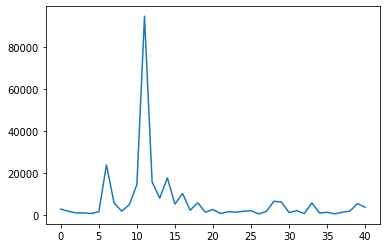

In [156]:
df[(df.Symbol=="HNDFDS") & (df.Date<'2019-10-20')].Volume.plot()

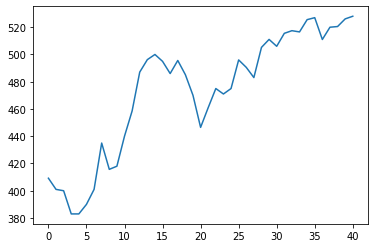

In [157]:
df[(df.Symbol=="HNDFDS") & (df.Date<'2019-10-20')].Low.plot()

In [245]:
scrips

['ASTEC']